In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_columns = ['rainfall_min', 'rainfall_max', 'rainfall_mean', 'rainfall_median', 'rainfall_std']

In [37]:
def outlier(col):
    plt.figure()
    ax = plt.gca()
    ax.boxplot(col)
    ax.set_ylabel('Value')

def detect_outliers(data):
    # 1분위수, 3분위수, IQR 계산
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # 이상치 경계 설정
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 이상치 식별
    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers

In [38]:
df_visitor = pd.read_csv("assets/output/visitors.csv")

In [39]:
df_visitor['visitor'] = df_visitor['visitor'].str.replace(',', '')

In [40]:
df_visitor['visitor'] = df_visitor['visitor'].astype(int)

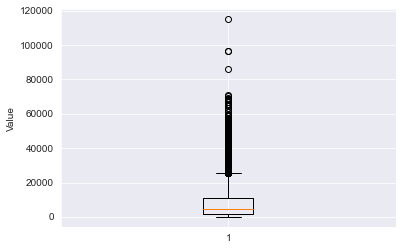

In [41]:
outlier(df_visitor['visitor'])

In [42]:
df_visitor.describe()

,visitor
count,3951.000000
mean,9122.186029
std,11653.034037
min,2.000000
25%,1840.000000
50%,4619.000000
75%,11280.500000
max,115002.000000


In [43]:
q1 = np.percentile(df_visitor['visitor'], 25)
q3 = np.percentile(df_visitor['visitor'], 75)
print("q1: {} q3: {}".format(q1, q3))

q1: 1840.0 q3: 11280.5


In [44]:
outliers = detect_outliers(df_visitor['visitor'])

In [45]:
non_outliers = df_visitor[~outliers]

In [46]:
non_outliers['visitor']

0       11483
1       14012
5        8374
6       13540
7       13507
        ...  
3946     2236
3947      925
3948      757
3949     2013
3950      628
Name: visitor, Length: 3586, dtype: int32

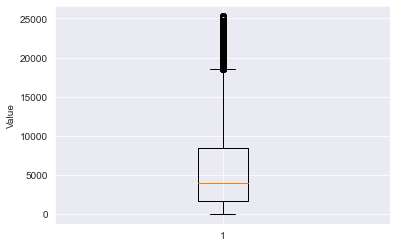

In [47]:
outlier(non_outliers['visitor'])

In [48]:
non_outliers.describe()

,visitor
count,3586.000000
mean,6098.088399
std,5901.432713
min,2.000000
25%,1692.250000
50%,3909.000000
75%,8441.000000
max,25286.000000


In [49]:
q1 = np.percentile(non_outliers['visitor'], 25)
q3 = np.percentile(non_outliers['visitor'], 75)
print("q1: {} q3: {}".format(q1, q3))

q1: 1692.25 q3: 8441.0


In [18]:
df = pd.read_csv('assets/output/preprocessedDataset.csv')

In [19]:
df.describe()

,sulfur_dioxide_min,sulfur_dioxide_max,sulfur_dioxide_mean,sulfur_dioxide_median,carbon_monoxide_min,carbon_monoxide_max,carbon_monoxide_mean,carbon_monoxide_median,ozone_min,ozone_max,ozone_mean,ozone_median,nitrogen_dioxide_min,nitrogen_dioxide_max,nitrogen_dioxide_mean,nitrogen_dioxide_median,fine_dust_pm10_min,fine_dust_pm10_max,fine_dust_pm10_mean,fine_dust_pm10_median,humidity_min,humidity_max,humidity_mean,humidity_median,highest temperature_min,highest temperature_max,highest temperature_mean,highest temperature_median,lowest temperature_min,lowest temperature_max,lowest temperature_mean,lowest temperature_median,visitor,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weekday_7.0
count,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000
mean,-5.882382e-17,-2.352953e-16,1.960794e-16,-2.352953e-16,2.205893e-16,3.088251e-16,2.058834e-16,-1.225496e-16,-8.823573e-17,-1.617655e-16,2.450993e-18,-3.431390e-17,-7.843176e-17,-3.529429e-16,-2.156873e-16,4.411787e-17,-5.637283e-17,9.803970e-17,-2.745112e-16,-3.921588e-17,-3.921588e-17,-7.475527e-16,3.186290e-16,3.799038e-16,-1.960794e-17,1.764715e-16,-1.470596e-16,9.803970e-17,1.666675e-16,-5.882382e-17,-2.941191e-17,3.921588e-17,9380.400483,0.147637,0.145912,0.141083,0.140048,0.145222,0.140738,0.139358
std,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,11441.201377,0.354801,0.353079,0.348167,0.347097,0.352386,0.347811,0.346380
min,-2.413301e+00,-1.610135e+00,-1.721856e+00,-1.640693e+00,-3.419278e+00,-2.357827e+00,-2.868181e+00,-2.745259e+00,-6.370697e-01,-1.872105e+00,-1.819604e+00,-1.357282e+00,-1.596500e+00,-2.817980e+00,-2.394184e+00,-2.238851e+00,-1.505788e+00,-2.187318e+00,-2.154300e+00,-2.076446e+00,-2.405488e+00,-3.176600e+00,-2.803438e+00,-2.688032e+00,-2.391468e+00,-2.564238e+00,-2.439808e+00,-2.549545e+00,-2.431146e+00,-2.755583e+00,-2.592144e+00,-2.580801e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.655719e-01,-9.345263e-01,-8.020603e-01,-1.043684e+00,-9.025667e-01,-5.791799e-01,-6.820386e-01,-8.634448e-01,-6.370697e-01,-7.043482e-01,-7.696003e-01,-8.886296e-01,-7.254517e-01,-6.580510e-01,-7.657952e-01,-7.703763e-01,-7.609616e-01,-6.783726e-01,-7.371312e-01,-7.742462e-01,-6.849592e-01,-4.162187e-01,-6.856860e-01,-7.130106e-01,-8.252516e-01,-8.772718e-01,-8.535690e-01,-8.514643e-01,-8.566575e-01,-8.299996e-01,-8.312619e-01,-8.433137e-01,2049.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.655719e-01,-2.589174e-01,-2.302953e-01,-4.466753e-01,-6.366293e-02,-2.234505e-01,-1.366560e-01,-2.361734e-01,-4.369326e-01,-1.621756e-01,-1.094100e-01,-1.643493e-01,-2.277097e-01,1.692683e-02,-8.957872e-02,-1.279185e-01,-1.651002e-01,-1.296650e-01,-1.160416e-01,-9.483755e-02,3.252328e-03,1.358576e-01,1.487386e-02,7.699790e-02,1.941790e-01,2.142947e-01,2.124346e-01,1.920489e-01,6.951225e-02,8.211899e-02,8.092163e-02,1.219570e-01,4970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.082927e-01,4.166915e-01,5.794091e-01,7.473420e-01,7.752409e-01,4.880081e-01,5.793749e-01,3.910980e-01,-3.665843e-02,6.302305e-01,6.870558e-01,6.451405e-01,5.189034e-01,6.919046e-0

In [20]:
df_temp = df.drop('date', axis=1)

In [53]:
df_temp['visitor']

0       11483.0
1       14012.0
2       58660.0
3       38961.0
4       34852.0
         ...   
3946     2236.0
3947      925.0
3948      757.0
3949     2013.0
3950      628.0
Name: visitor, Length: 3951, dtype: float64

In [54]:
# df_temp['visitor'] = df_temp['visitor'].str.replace(',', '')
# df_temp['visitor'] = df_temp['visitor'].astype(int)

(array([2.992e+03, 5.250e+02, 2.460e+02, 1.050e+02, 5.600e+01, 2.000e+01,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([2.00000e+00, 1.15020e+04, 2.30020e+04, 3.45020e+04, 4.60020e+04,
        5.75020e+04, 6.90020e+04, 8.05020e+04, 9.20020e+04, 1.03502e+05,
        1.15002e+05]),
 <BarContainer object of 10 artists>)

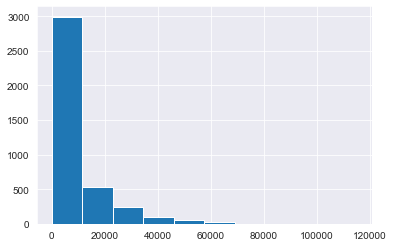

In [55]:
plt.hist(df_temp['visitor'])

In [56]:
df_temp

,sulfur_dioxide_min,sulfur_dioxide_max,sulfur_dioxide_mean,sulfur_dioxide_median,sulfur_dioxide_std,carbon_monoxide_min,carbon_monoxide_max,carbon_monoxide_mean,carbon_monoxide_median,carbon_monoxide_std,...,sky state_median_2.0,sky state_median_3.0,sky state_median_4.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weekday_7.0
0,-0.103174,-0.610634,-0.464415,-0.537652,-0.720722,-1.369441,-0.158715,-0.528510,-0.402259,0.820602,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.670446,0.226266,-0.221451,-0.166854,0.238398,-1.946222,-0.852389,-1.052815,-0.805120,-0.270850,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.464098,0.226266,0.158179,0.203943,-0.082826,-0.792661,-0.852389,-0.748380,-0.805120,-0.633946,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.464098,0.226266,0.461884,0.574741,0.123268,-0.792661,-0.621164,-0.714554,-0.603689,-0.473053,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.031370,0.435491,0.674477,0.574741,0.044930,-0.792661,-0.621164,-0.663815,-0.402259,-0.464889,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,1.371733,0.812096,1.202923,1.205096,0.563057,0.476256,1.228633,1.264271,1.249470,0.941551,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3947,0.804461,0.602871,0.808107,0.834299,0.277685,-0.446593,0.026265,-0.027885,0.040888,0.217493,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3948,0.123735,0.393646,0.337365,0.278103,1.187247,-0.215880,0.303735,-0.024502,-0.160543,0.577397,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3949,2.165914,1.690840,2.101889,2.206250,0.977355,1.514461,1.136144,1.484141,1.370328,0.748558,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


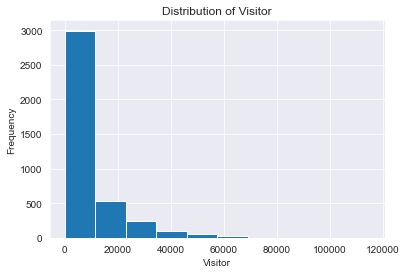

In [57]:
plt.hist(df['visitor'], bins=10)
plt.xlabel('Visitor')
plt.ylabel('Frequency')
plt.title('Distribution of Visitor')
plt.show()

In [58]:
df_temp['visitor'].sort_values()

1933         2.0
2912         2.0
2913         7.0
822          9.0
1922        11.0
          ...   
192      70880.0
1985     86100.0
581      96434.0
96       96434.0
922     115002.0
Name: visitor, Length: 3951, dtype: float64

In [59]:
df_temp['visitor'].sort_values(ascending=False)

922     115002.0
96       96434.0
581      96434.0
1985     86100.0
192      70880.0
          ...   
1922        11.0
822          9.0
2913         7.0
1933         2.0
2912         2.0
Name: visitor, Length: 3951, dtype: float64

In [60]:
df_temp['visitor'].describe()

count      3951.000000
mean       9122.186029
std       11653.034037
min           2.000000
25%        1840.000000
50%        4619.000000
75%       11280.500000
max      115002.000000
Name: visitor, dtype: float64

In [21]:
df_temp.corr()['visitor']

sulfur_dioxide_min            0.017458
sulfur_dioxide_max            0.056913
sulfur_dioxide_mean           0.042373
sulfur_dioxide_median         0.041805
carbon_monoxide_min           0.007728
carbon_monoxide_max          -0.047662
carbon_monoxide_mean         -0.006657
carbon_monoxide_median        0.016605
ozone_min                    -0.047742
ozone_max                     0.224502
ozone_mean                    0.169474
ozone_median                  0.087057
nitrogen_dioxide_min         -0.020014
nitrogen_dioxide_max          0.146204
nitrogen_dioxide_mean         0.077802
nitrogen_dioxide_median       0.069024
fine_dust_pm10_min            0.097030
fine_dust_pm10_max            0.081261
fine_dust_pm10_mean           0.103794
fine_dust_pm10_median         0.107517
humidity_min                  0.066595
humidity_max                  0.042499
humidity_mean                 0.053268
humidity_median               0.045191
highest temperature_min       0.111076
highest temperature_max  

In [62]:
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # 히트맵 크기 조정
# plt.figure(figsize=(32, 24))
# sns.set(font_scale=1.2)
#
# # 히트맵 그리기
# correlation_matrix = df_temp.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#
# # x축과 y축 레이블 회전
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
#
# # 그래프 제목 설정
# plt.title('Correlation Matrix')
#
# # 그래프 출력
# plt.show()

In [22]:
# df.corr 기본 값은 pearson입니다
df_corr = df_temp.corr()

In [23]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
pearson = np.abs(df_corr['visitor'])
print(pearson)

#ozone_max, nitrogen_dioxide_max, lowest temperature_min, highest temperature_max,fine_dust_pm10_min ,humidity_mean,carbon_monoxide_max, wind direction_min
# sulfur_dioxide_min, rainfall_max, probability of precipitation_max, wind speed_max 

sulfur_dioxide_min            0.017458
sulfur_dioxide_max            0.056913
sulfur_dioxide_mean           0.042373
sulfur_dioxide_median         0.041805
carbon_monoxide_min           0.007728
carbon_monoxide_max           0.047662
carbon_monoxide_mean          0.006657
carbon_monoxide_median        0.016605
ozone_min                     0.047742
ozone_max                     0.224502
ozone_mean                    0.169474
ozone_median                  0.087057
nitrogen_dioxide_min          0.020014
nitrogen_dioxide_max          0.146204
nitrogen_dioxide_mean         0.077802
nitrogen_dioxide_median       0.069024
fine_dust_pm10_min            0.097030
fine_dust_pm10_max            0.081261
fine_dust_pm10_mean           0.103794
fine_dust_pm10_median         0.107517
humidity_min                  0.066595
humidity_max                  0.042499
humidity_mean                 0.053268
humidity_median               0.045191
highest temperature_min       0.111076
highest temperature_max  

## 상관도 높은 순서: 주말, 오존, 온도
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> min, fine_dust -> median, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> min, wind direction -> min, skystate -> max

In [9]:
df_temp.corr(method='kendall')['visitor']

sulfur_dioxide_min      -0.116007
sulfur_dioxide_max      -0.015797
sulfur_dioxide_mean     -0.040749
sulfur_dioxide_median   -0.048785
carbon_monoxide_min     -0.052174
                           ...   
weekday_3.0             -0.112544
weekday_4.0             -0.101523
weekday_5.0             -0.047098
weekday_6.0              0.259337
weekday_7.0              0.220517
Name: visitor, Length: 100, dtype: float64

## 상관도 높은 순서: 주말, 오존, 온도, 습도
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> median,
## wind direction -> min, skystate -> max

In [10]:
df_temp.corr(method='spearman')['visitor']

sulfur_dioxide_min      -0.152076
sulfur_dioxide_max      -0.022849
sulfur_dioxide_mean     -0.063964
sulfur_dioxide_median   -0.069535
carbon_monoxide_min     -0.071462
                           ...   
weekday_3.0             -0.137790
weekday_4.0             -0.124296
weekday_5.0             -0.057663
weekday_6.0              0.317509
weekday_7.0              0.269981
Name: visitor, Length: 100, dtype: float64

## 상관도 높은 순서: 오존, 온도, 습도 & 일산화탄소
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> mean med유사,
## wind direction -> min, skystate -> max

# 종합
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> med,
## wind direction -> min, skystate -> max

In [67]:
selected_feat = ['sulfur_dioxide_min', 'carbon_monoxide_max', 'ozone_max', 'nitrogen_dioxide_max', 'fine_dust_pm10_max',                 'rainfall_mean', 'probability of precipitation_min', 'humidity_min', 'highest temperature_max',                 'lowest temperature_min', 'wind speed_median', 'visitor']

In [68]:
df_selected = df[selected_feat]

In [69]:
df_selected.corr().iloc[:,-1]

sulfur_dioxide_min                 -0.021263
carbon_monoxide_max                -0.110792
ozone_max                           0.265874
nitrogen_dioxide_max                0.090950
fine_dust_pm10_max                  0.023442
rainfall_mean                      -0.050165
probability of precipitation_min    0.035505
humidity_min                        0.074496
highest temperature_max             0.175116
lowest temperature_min              0.173374
wind speed_median                  -0.055486
visitor                             1.000000
Name: visitor, dtype: float64

In [70]:
df_selected.corr(method='kendall').iloc[:,-1]

sulfur_dioxide_min                 -0.090991
carbon_monoxide_max                -0.098737
ozone_max                           0.259777
nitrogen_dioxide_max                0.059088
fine_dust_pm10_max                  0.028219
rainfall_mean                       0.020338
probability of precipitation_min    0.055104
humidity_min                        0.091097
highest temperature_max             0.178483
lowest temperature_min              0.176299
wind speed_median                  -0.072114
visitor                             1.000000
Name: visitor, dtype: float64

In [71]:
df_selected.corr(method='spearman').iloc[:,-1]

sulfur_dioxide_min                 -0.125357
carbon_monoxide_max                -0.148388
ozone_max                           0.390589
nitrogen_dioxide_max                0.087642
fine_dust_pm10_max                  0.042020
rainfall_mean                       0.027557
probability of precipitation_min    0.073442
humidity_min                        0.131807
highest temperature_max             0.262179
lowest temperature_min              0.257423
wind speed_median                  -0.103605
visitor                             1.000000
Name: visitor, dtype: float64

In [72]:
abs(df_selected.corr().iloc[:,-1])

sulfur_dioxide_min                  0.021263
carbon_monoxide_max                 0.110792
ozone_max                           0.265874
nitrogen_dioxide_max                0.090950
fine_dust_pm10_max                  0.023442
rainfall_mean                       0.050165
probability of precipitation_min    0.035505
humidity_min                        0.074496
highest temperature_max             0.175116
lowest temperature_min              0.173374
wind speed_median                   0.055486
visitor                             1.000000
Name: visitor, dtype: float64

In [73]:
abs(df_temp.corr(method='kendall')['visitor'])

sulfur_dioxide_min       0.090991
sulfur_dioxide_max       0.026713
sulfur_dioxide_mean      0.050574
sulfur_dioxide_median    0.057604
sulfur_dioxide_std       0.055543
                           ...   
weekday_3.0              0.098525
weekday_4.0              0.081009
weekday_5.0              0.038320
weekday_6.0              0.213039
weekday_7.0              0.219046
Name: visitor, Length: 116, dtype: float64

In [74]:
abs(df_temp.corr(method='spearman')['visitor'])

sulfur_dioxide_min       0.125357
sulfur_dioxide_max       0.040178
sulfur_dioxide_mean      0.079862
sulfur_dioxide_median    0.085453
sulfur_dioxide_std       0.083915
                           ...   
weekday_3.0              0.120649
weekday_4.0              0.099199
weekday_5.0              0.046925
weekday_6.0              0.260876
weekday_7.0              0.268231
Name: visitor, Length: 116, dtype: float64

In [78]:
df_temp['highest temperature_max'].describe()

count    3.951000e+03
mean    -4.018271e-16
std      1.000127e+00
min     -2.604460e+00
25%     -8.658486e-01
50%      1.966364e-01
75%      8.727631e-01
max      1.838659e+00
Name: highest temperature_max, dtype: float64